## Conjunto de dados de viagem do viajante

**Acesso:**
rkiattisak/traveler-trip-data

**Sobre o conjunto de dados:**
O conjunto de dados de viagem fornece informações detalhadas sobre várias viagens feitas por viajantes, incluindo seu destino, datas de viagem, duração da viagem em dias, dados demográficos do viajante (nome, idade, sexo e nacionalidade), bem como o tipo e custo de acomodação e transporte. Este conjunto de dados pode ser usado para obter insights sobre padrões de viagem, preferências e comportamentos de diferentes tipos de viajantes. Também pode ser útil para empresas relacionadas a viagens, como agências de viagens, para criar estratégias de marketing personalizadas e pacotes de viagem que atendam às necessidades e preferências de diferentes viajantes.

Fonte de dados: [Kaggle](https://www.kaggle.com/datasets/rkiattisak/traveler-trip-data/data)

In [302]:
# Bibliotecas utilizadas
import pandas as pd
import os
import kagglehub
import numpy as np
import matplotlib.pyplot as plt

In [303]:
path = kagglehub.dataset_download("rkiattisak/traveler-trip-data")
files = os.listdir(path)

print("Arquivos encontrados no diretório:", files)

Arquivos encontrados no diretório: ['Travel details dataset.csv']


In [304]:
df = pd.read_csv(f"{path}/Travel details dataset.csv")

In [305]:
# Apresentação do conjunto de dados
df.head()

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200


## Verificação dos dados

In [306]:
null_values = df.isnull().sum()

print(null_values)

Trip ID                 0
Destination             2
Start date              2
End date                2
Duration (days)         2
Traveler name           2
Traveler age            2
Traveler gender         2
Traveler nationality    2
Accommodation type      2
Accommodation cost      2
Transportation type     3
Transportation cost     3
dtype: int64


In [307]:
# Checagem de valores nulos
filtered_df = df[df.isnull().any(axis=1)]
filtered_df

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
71,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,83,"Rome, Italy",4/15/2025,4/22/2025,7.0,James Kim,41.0,Male,American,Hotel,100,NaN,NaN
127,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [308]:
# Remoção das linhas onde 'Trip ID' é 72 ou 128
df = df[~df['Trip ID'].isin([72, 128])]

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 0 to 138
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Trip ID               137 non-null    int64  
 1   Destination           137 non-null    object 
 2   Start date            137 non-null    object 
 3   End date              137 non-null    object 
 4   Duration (days)       137 non-null    float64
 5   Traveler name         137 non-null    object 
 6   Traveler age          137 non-null    float64
 7   Traveler gender       137 non-null    object 
 8   Traveler nationality  137 non-null    object 
 9   Accommodation type    137 non-null    object 
 10  Accommodation cost    137 non-null    object 
 11  Transportation type   136 non-null    object 
 12  Transportation cost   136 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 15.0+ KB


* Leve discrepância de um valor faltante em "Transportation Cost" e "Transportation type"

### Vendas de viagem por períodos

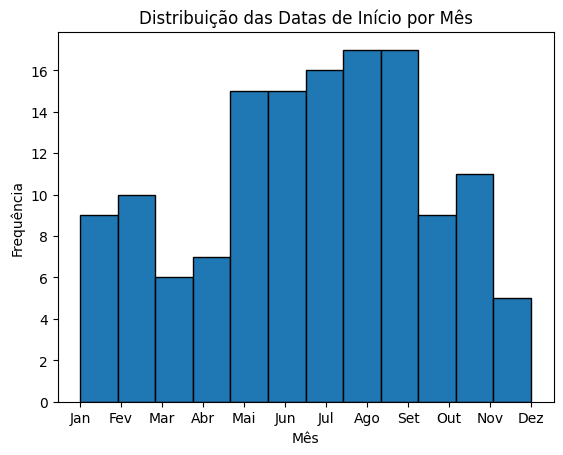

In [310]:
# Convertendo para o tipo datetime
df['Start date'] = pd.to_datetime(df['Start date'])
df['End date'] = pd.to_datetime(df['End date'])

# Extraindo o mês da coluna 'Start date'
df['Month'] = df['Start date'].dt.month

# Criando histograma para a coluna 'Month'
plt.hist(df['Month'], bins=12, edgecolor='black', range=(1, 12))
plt.title('Distribuição das Datas de Início por Mês')
plt.xlabel('Mês')
plt.ylabel('Frequência')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.show()

*  Mai, Jun, Jul, Ago, Set são os meses de alta demanda de viagens;

In [311]:
high_demand_months = [5, 6, 7, 8, 9]  # Mai, Jun, Jul, Ago, Set
df['Travel Demand'] = df['Month'].apply(lambda x: 'High' if x in high_demand_months else 'Low')

### Custos de transporte e acomodação

In [312]:
print('Valores de custo de transporte despadronizados:')
unique_transportationcost = df['Transportation cost'].dropna().unique()
sorted_transportationcost = sorted(unique_transportationcost)
print(sorted_transportationcost)

print('\nValores de custo de acomodação despadronizados:')
unique_accommodationcost = df['Accommodation cost'].dropna().unique()
sorted_accommodationcost = sorted(unique_accommodationcost)
print(sorted_accommodationcost)


Valores de custo de transporte despadronizados:
['$1,000 ', '$1,200 ', '$1,500 ', '$100 ', '$120 ', '$150 ', '$20 ', '$200 ', '$250 ', '$300 ', '$400 ', '$50 ', '$500 ', '$600 ', '$700 ', '$75 ', '$80 ', '$800 ', '$900 ', '100', '100 USD', '1000', '1000 USD', '1200', '150', '150 USD', '1500', '200', '200 USD', '2000', '250', '2500', '300', '300 USD', '3000', '350 USD', '400', '400 USD', '50', '500', '500 USD', '600', '600 USD', '700', '700 USD', '800', '800 USD', '900']

Valores de custo de acomodação despadronizados:
['$1,000 ', '$1,100 ', '$1,200 ', '$1,400 ', '$1,500 ', '$150 ', '$180 ', '$2,000 ', '$200 ', '$300 ', '$350 ', '$400 ', '$500 ', '$600 ', '$700 ', '$800 ', '$900 ', '100', '1000', '1000 USD', '1100', '1200', '1200 USD', '1300', '1400', '1500', '1500 USD', '1800', '200', '200 USD', '2000', '2200', '2500', '300', '300 USD', '3000', '400', '400 USD', '4000', '500', '500 USD', '5000', '600', '600 USD', '6000', '700', '700 USD', '7000', '800', '800 USD', '8000', '900', '900 U

* Necessidade de padronizar valores numéricos em formato float, removendo símbolos e texto adicional (exemplos de formatos no dataset: $1,400, 400, 400 USD).


In [313]:
#função para padronizar custos
def padronizar_valores(valor):
    # Verificar se o valor é NaN ou None
    if pd.isna(valor) or valor is None or str(valor).strip().lower() == 'nan':
        return float(0.0)

    valor = str(valor).strip()

    # Remover 'USD' e outros caracteres não numéricos
    valor = valor.replace('USD', '').replace('$', '').strip()

    try:
        valor = float(valor)
        valor = round(valor, 2)  # Arredonda para 2 casas decimais
    except ValueError:
        valor = 0.0

    return f"{valor:.2f}"


In [338]:
#padronização dos dados de custo de transporte
print('Valores de custo de transporte Padronizados:')

df['Transportation cost'] = df['Transportation cost'].apply(padronizar_valores).astype(float)

valores_unicos = df['Transportation cost'].values
valores_unicos_float = valores_unicos.astype(float)
valores_unicos_float_sorted = sorted(valores_unicos_float)
valores_unicos_float_sorted = [float(valor) for valor in valores_unicos_float_sorted]
print(valores_unicos_float_sorted)

Valores de custo de transporte Padronizados:
[20.0, 50.0, 50.0, 50.0, 75.0, 80.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 120.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 250.0, 250.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 350.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 700.0, 700.0, 700.0, 700.0, 700.0, 700.0, 700.0, 700.0, 700.0, 700.0, 700.0, 700.0, 700.0, 700.0, 700.0, 800.0, 800.0, 800.0, 800.0, 800.0, 800.0, 800.0, 800.0, 800.0, 800.0, 800.0, 800.0, 800.0, 800.0, 800.0, 800.0, 900.0, 900.0, 900.0, 900.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1500.0, 1500.0, 1800.0, 2000.0, 2000.0, 2500.0, 2500.0, 2500.0, 2

In [315]:
# Filtrando os valores iguais a 0.0 de custo de transporte
df_tc_nulo = df[df['Transportation cost'] == 0.0]

quantidade_tc_nulo = len(df_tc_nulo)
print(f"Quantidade de valores nulos na coluna 'Transportation cost': {quantidade_tc_nulo}\n")

df_tc_nulo[['Trip ID','Travel Demand','Duration (days)','Traveler nationality','Destination', 'Transportation type', 'Transportation cost']]

Quantidade de valores nulos na coluna 'Transportation cost': 4



,Trip ID,Travel Demand,Duration (days),Traveler nationality,Destination,Transportation type,Transportation cost
82,83,Low,7.0,American,"Rome, Italy",NaN,0.0
96,97,Low,9.0,South Korea,Sydney,Plane,0.0
101,102,Low,8.0,Spain,Cape Town,Plane,0.0
103,104,High,6.0,South Korea,Bali,Plane,0.0


In [316]:
# Adicionar valores fictícios de Transportation cost a partir do Trip ID
df.loc[df['Trip ID'] == 83, 'Transportation cost'] = 150.00
df.loc[df['Trip ID'] == 97, 'Transportation cost'] = 1200.00
df.loc[df['Trip ID'] == 102, 'Transportation cost'] = 1000.00
df.loc[df['Trip ID'] == 104, 'Transportation cost'] = 1800.00

In [317]:
# Calcular a média da coluna 'Transportation cost'
avg_tc = df['Transportation cost'].mean()
print(f"A média do 'Transportation cost' é: {avg_tc}")

A média do 'Transportation cost' é: 643.7591240875912


In [318]:
#padronização dos dados de custo de acomodação
print('Valores de custo de acomodação Padronizados:')

df['Accommodation cost'] = df['Accommodation cost'].apply(padronizar_valores).astype(float)

valores_unicos = df['Accommodation cost'].values
valores_unicos_float = valores_unicos.astype(float)
valores_unicos_float_sorted = sorted(valores_unicos_float)
valores_unicos_float_sorted = [float(valor) for valor in valores_unicos_float_sorted]
print(valores_unicos_float_sorted)

Valores de custo de acomodação Padronizados:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 150.0, 180.0, 200.0, 200.0, 200.0, 200.0, 300.0, 300.0, 300.0, 300.0, 350.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 700.0, 700.0, 700.0, 700.0, 700.0, 700.0, 700.0, 700.0, 800.0, 800.0, 800.0, 800.0, 800.0, 800.0, 800.0, 800.0, 800.0, 800.0, 800.0, 800.0, 800.0, 800.0, 900.0, 900.0, 900.0, 900.0, 900.0, 900.0, 900.0, 900.0, 900.0, 900.0, 900.0, 900.0, 900.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1100.0, 1100.0, 1100.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1300.0, 1300.0, 1400.0, 1400.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1800.0, 2000.0, 2000.0, 2000.0, 2200.0, 2200.0, 2500.0, 2500.0, 3000.0, 3000.0, 4000.0, 5000.0, 5000.0, 6000.0, 6000

In [319]:
# Filtrando os valores iguais a 0.0 de custo de acomodação
df_ac_nulo = df[df['Accommodation cost'] == 0.0]

quantidade_ac_nulo = len(df_ac_nulo)
print(f"Quantidade de valores nulos na coluna 'Accommodation cost': {quantidade_ac_nulo}\n")

df_ac_nulo[['Trip ID','Travel Demand','Duration (days)','Destination', 'Accommodation type', 'Accommodation cost']]

Quantidade de valores nulos na coluna 'Accommodation cost': 13



,Trip ID,Travel Demand,Duration (days),Destination,Accommodation type,Accommodation cost
17,18,High,10.0,Bali,Resort,0.0
18,19,High,6.0,London,Hotel,0.0
19,20,Low,10.0,Tokyo,Hotel,0.0
21,22,Low,7.0,Sydney,Hotel,0.0
24,25,Low,6.0,Paris,Hotel,0.0
25,26,High,9.0,Hawaii,Resort,0.0
26,27,Low,8.0,Barcelona,Hotel,0.0
30,31,High,13.0,Australia,Hotel,0.0
49,50,High,7.0,"Paris, France",Hotel,0.0
52,53,Low,7.0,"New York, USA",Hotel,0.0


In [320]:
# Adicionar valores fictícios de Accommodation cost a partir do Trip ID
df.loc[df['Trip ID'] == 18, 'Accommodation cost'] = 500.00
df.loc[df['Trip ID'] == 19, 'Accommodation cost'] = 200.00
df.loc[df['Trip ID'] == 20, 'Accommodation cost'] = 150.00
df.loc[df['Trip ID'] == 22, 'Accommodation cost'] = 120.00
df.loc[df['Trip ID'] == 25, 'Accommodation cost'] = 180.00
df.loc[df['Trip ID'] == 26, 'Accommodation cost'] = 550.00
df.loc[df['Trip ID'] == 27, 'Accommodation cost'] = 170.00
df.loc[df['Trip ID'] == 31, 'Accommodation cost'] = 220.00
df.loc[df['Trip ID'] == 50, 'Accommodation cost'] = 160.00
df.loc[df['Trip ID'] == 53, 'Accommodation cost'] = 210.00
df.loc[df['Trip ID'] == 56, 'Accommodation cost'] = 190.00
df.loc[df['Trip ID'] == 59, 'Accommodation cost'] = 230.00
df.loc[df['Trip ID'] == 104, 'Accommodation cost'] = 300.00

In [321]:
# Calcular a média da coluna 'Accommodation cost'
avg_ac = df['Accommodation cost'].mean()
print(f"A média do 'Accommodation cost' é: {avg_ac}")

A média do 'Accommodation cost' é: 1148.6131386861314


### Tipo de Transporte

In [322]:
#Filtrar variaveis unicas de tipo de transporte
unique_transportationtype = df['Transportation type'].dropna().unique()
sorted_transportationtype = sorted(unique_transportationtype)
print(sorted_transportationtype)

['Airplane', 'Bus', 'Car', 'Car rental', 'Ferry', 'Flight', 'Plane', 'Subway', 'Train']


* Necessidade de padronizar os termos "Plane", "Flight" e "Airplane" em uma única variável;

* Necessidade de padronizar as opções de "Car", incluindo "Car" e "Car rental", em uma única variável;

* Padronização de valores nulos para "Not specified".

In [323]:
#padronizar variaveis tipo de transporte
df.loc[df['Transportation type'].str.contains('Plane|Flight', case=False, na=False), 'Transportation type'] = 'Airplane'
df.loc[df['Transportation type'].str.contains('Car rental', case=False, na=False), 'Transportation type'] = 'Car'
df['Transportation type'] = df['Transportation type'].fillna('Not specified')

# Ver o resultado
sorted_transportationtype = df['Transportation type'].unique()
print(sorted_transportationtype)

['Airplane' 'Train' 'Bus' 'Car' 'Subway' 'Not specified' 'Ferry']


### Tipo de acomodação

In [324]:
#Filtrar variaveis unicas de tipo de acomodação
unique_accommodationtype = df['Accommodation type'].dropna().unique()
sorted_accommodationtype = sorted(unique_accommodationtype)
print(sorted_accommodationtype)

['Airbnb', 'Guesthouse', 'Hostel', 'Hotel', 'Resort', 'Riad', 'Vacation rental', 'Villa']


* Variavéis bem definidas, sem necessidade de mudanças;

### Nacionalidade

In [325]:
#Filtrar variaveis unicas de nacionalidade
unique_nationality = df['Traveler nationality'].dropna().unique()
sorted_nationality = sorted(unique_nationality)
print(sorted_nationality)

['American', 'Australian', 'Brazil', 'Brazilian', 'British', 'Cambodia', 'Canada', 'Canadian', 'China', 'Chinese', 'Dutch', 'Emirati', 'French', 'German', 'Germany', 'Greece', 'Hong Kong', 'Indian', 'Indonesian', 'Italian', 'Italy', 'Japan', 'Japanese', 'Korean', 'Mexican', 'Moroccan', 'New Zealander', 'Scottish', 'Singapore', 'South African', 'South Korea', 'South Korean', 'Spain', 'Spanish', 'Taiwan', 'Taiwanese', 'UK', 'USA', 'United Arab Emirates', 'United Kingdom', 'Vietnamese']


* Algumas nacionalidades são registradas com variações, como "Brasil" e "Brazilian" ou "Canada" e "Canadian". É necessário criar um dicionário para corrigir essas discrepâncias nos cadastros.

In [326]:
# Dicionário de mapeamento
nationality_to_standard = {
    'Brazil': 'Brazilian',
    'Cambodia': 'Cambodian',
    'Canada': 'Canadian',
    'China': 'Chinese',
    'Germany': 'German',
    'Greece': 'Greek',
    'Hong Kong': 'Hong Konger',
    'India': 'Indian',
    'Indonesia': 'Indonesian',
    'Italy': 'Italian',
    'Japan': 'Japanese',
    'South Korea': 'Korean',
    'Mexico': 'Mexican',
    'Morocco': 'Moroccan',
    'New Zealand': 'New Zealander',
    'Scotland': 'Scottish',
    'Singapore': 'Singaporean',
    'South Africa': 'South African',
    'Spain': 'Spanish',
    'Taiwan': 'Taiwanese',
    'Vietnam': 'Vietnamese',
    'United States': 'American',
    'United Kingdom': 'British',
    'United Arab Emirates': 'Emirati',
    'Australia': 'Australian',
    'Thailand': 'Thai'
}

# Padronizar as nacionalidades usando o dicionário de mapeamento
df['Traveler nationality'] = df['Traveler nationality'].map(lambda x: nationality_to_standard.get(x, x))

df_sorted = df.sort_values(by='Traveler nationality')
print(df['Traveler nationality'])

0           American
1           Canadian
2             Korean
3            British
4         Vietnamese
           ...      
134        Brazilian
135         Canadian
136          Chinese
137          Spanish
138    New Zealander
Name: Traveler nationality, Length: 137, dtype: object


### Destinos

In [327]:
#Filtrar variaveis unicas de destinos
unique_destinations = df['Destination'].dropna().unique()
sorted_destinations = sorted(unique_destinations)
print(sorted_destinations)

['Amsterdam', 'Amsterdam, Netherlands', 'Athens, Greece', 'Auckland, New Zealand', 'Australia', 'Bali', 'Bali, Indonesia', 'Bangkok', 'Bangkok, Thai', 'Bangkok, Thailand', 'Barcelona', 'Barcelona, Spain', 'Berlin, Germany', 'Brazil', 'Canada', 'Cancun, Mexico', 'Cape Town', 'Cape Town, SA', 'Cape Town, South Africa', 'Dubai', 'Dubai, United Arab Emirates', 'Edinburgh, Scotland', 'Egypt', 'France', 'Greece', 'Hawaii', 'Honolulu, Hawaii', 'Italy', 'Japan', 'London', 'London, UK', 'Los Angeles, USA', 'Marrakech, Morocco', 'Mexico', 'New York', 'New York City, USA', 'New York, USA', 'Paris', 'Paris, France', 'Phnom Penh', 'Phuket', 'Phuket, Thai', 'Phuket, Thailand', 'Rio de Janeiro', 'Rio de Janeiro, Brazil', 'Rome', 'Rome, Italy', 'Santorini', 'Seoul', 'Seoul, South Korea', 'Spain', 'Sydney', 'Sydney, AUS', 'Sydney, Aus', 'Sydney, Australia', 'Thailand', 'Tokyo', 'Tokyo, Japan', 'Vancouver, Canada']


In [328]:
# Dicionário de mapeamento
destination_to_country = {
    'Amsterdam': 'Netherlands',
    'Athens': 'Greece',
    'Auckland': 'New Zealand',
    'Bali': 'Indonesia',
    'Bangkok': 'Thailand',
    'Barcelona': 'Spain',
    'Berlin': 'Germany',
    'Cancun': 'Mexico',
    'Cape Town': 'South Africa',
    'Dubai': 'United Arab Emirates',
    'Edinburgh': 'United Kingdom',
    'Hawaii': 'United States',
    'Honolulu': 'United States',
    'London': 'United Kingdom',
    'Los Angeles': 'United States',
    'Marrakech': 'Morocco',
    'New York': 'United States',
    'Paris': 'France',
    'Phnom Penh': 'Cambodia',
    'Phuket': 'Thailand',
    'Rio de Janeiro': 'Brazil',
    'Rome': 'Italy',
    'Santorini': 'Greece',
    'Seoul': 'South Korea',
    'Sydney': 'Australia',
    'Scotland': 'United Kingdom',
    'Tokyo': 'Japan',
    'Vancouver': 'Canada'
}

# Padronizar destinos
for destination in destination_to_country.keys():
    df.loc[df['Destination'].str.contains(destination, case=False, na=False), 'Destination'] = destination

# Adicionar a coluna de país usando o dicionário
df['Country Destination'] = df['Destination'].map(destination_to_country)


In [329]:
#resultado
df_sorted = df[['Destination', 'Country Destination']].sort_values(by=['Destination', 'Country Destination'])
print(df_sorted.head())

    Destination Country Destination
8     Amsterdam         Netherlands
48    Amsterdam         Netherlands
104   Amsterdam         Netherlands
122      Athens              Greece
138    Auckland         New Zealand


In [330]:
#checagem de valores nulos
null_values = df.isnull().sum()

print(null_values)

Trip ID                  0
Destination              0
Start date               0
End date                 0
Duration (days)          0
Traveler name            0
Traveler age             0
Traveler gender          0
Traveler nationality     0
Accommodation type       0
Accommodation cost       0
Transportation type      0
Transportation cost      0
Month                    0
Travel Demand            0
Country Destination     11
dtype: int64


In [331]:
#filtro de paises nulos
filtered_df = df[df['Country Destination'].isnull()]
filtered_df[['Destination', 'Country Destination']]


,Destination,Country Destination
27,Japan,NaN
28,Thailand,NaN
29,France,NaN
30,Australia,NaN
31,Brazil,NaN
32,Greece,NaN
33,Egypt,NaN
34,Mexico,NaN
35,Italy,NaN
36,Spain,NaN


In [332]:
# Lista de países
countries = ['Japan', 'Thailand', 'France', 'Australia', 'Brazil', 'Greece', 'Egypt', 'Mexico', 'Italy', 'Spain', 'Canada']

# Preencher 'Country Destination' com valores de 'Destination' onde o valor de 'Destination' é um país
df['Country Destination'] = df.apply(lambda row: row['Destination'] if row['Destination'] in countries else row['Country Destination'], axis=1)

# Deixar 'Destination' vazio (NaN) para as linhas onde 'Destination' é um país
df.loc[df['Destination'].isin(countries), 'Destination'] = np.nan

In [333]:
# Substitui os valores nulos (NaN) na coluna 'Destination' por 'Não especificado'
df['Destination'] = df['Destination'].fillna('Not specified')

In [334]:
#renomeando destinos não conhecidos
filtered_df = df[df['Destination'] == 'Not specified']
filtered_df[['Destination', 'Country Destination']]


,Destination,Country Destination
27,Not specified,Japan
28,Not specified,Thailand
29,Not specified,France
30,Not specified,Australia
31,Not specified,Brazil
32,Not specified,Greece
33,Not specified,Egypt
34,Not specified,Mexico
35,Not specified,Italy
36,Not specified,Spain


## Verificação de Resultado

In [335]:
#checagem de valores nulos
null_values = df.isnull().sum()

print(null_values)

Trip ID                 0
Destination             0
Start date              0
End date                0
Duration (days)         0
Traveler name           0
Traveler age            0
Traveler gender         0
Traveler nationality    0
Accommodation type      0
Accommodation cost      0
Transportation type     0
Transportation cost     0
Month                   0
Travel Demand           0
Country Destination     0
dtype: int64


In [336]:
df.head()

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,Month,Travel Demand,Country Destination
0,1,London,2023-05-01,2023-05-08,7.0,John Smith,35.0,Male,American,Hotel,1200.0,Airplane,600.0,5,High,United Kingdom
1,2,Phuket,2023-06-15,2023-06-20,5.0,Jane Doe,28.0,Female,Canadian,Resort,800.0,Airplane,500.0,6,High,Thailand
2,3,Bali,2023-07-01,2023-07-08,7.0,David Lee,45.0,Male,Korean,Villa,1000.0,Airplane,700.0,7,High,Indonesia
3,4,New York,2023-08-15,2023-08-29,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000.0,Airplane,1000.0,8,High,United States
4,5,Tokyo,2023-09-10,2023-09-17,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700.0,Train,200.0,9,High,Japan


In [337]:
df.to_excel('traveler-trip_dataset.xlsx', index=False)